# DISTANCE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.ticker import LogLocator
import plotly.express as px

In [2]:
# Load the Uber dataset
df=pd.read_csv("UberDataset.csv")

In [4]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [5]:
# Convert data type of the START_DATE and END_DATE to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


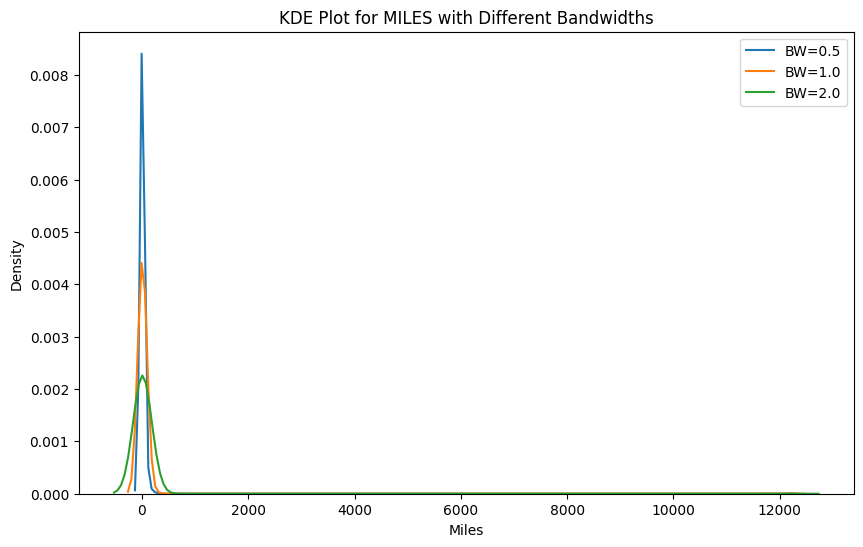

In [7]:
# KDE plot for MILES with different bandwidths
plt.figure(figsize=(10, 6))
sns.kdeplot(df['MILES'], bw_adjust=0.5, label="BW=0.5")
sns.kdeplot(df['MILES'], bw_adjust=1.0, label="BW=1.0")
sns.kdeplot(df['MILES'], bw_adjust=2.0, label="BW=2.0")
plt.title("KDE Plot for MILES with Different Bandwidths")
plt.xlabel("Miles")
plt.ylabel("Density")
plt.legend()
plt.show()
# Insight: The KDE plot shows the distribution of trip distances. Peaks highlight the most common trip distances.


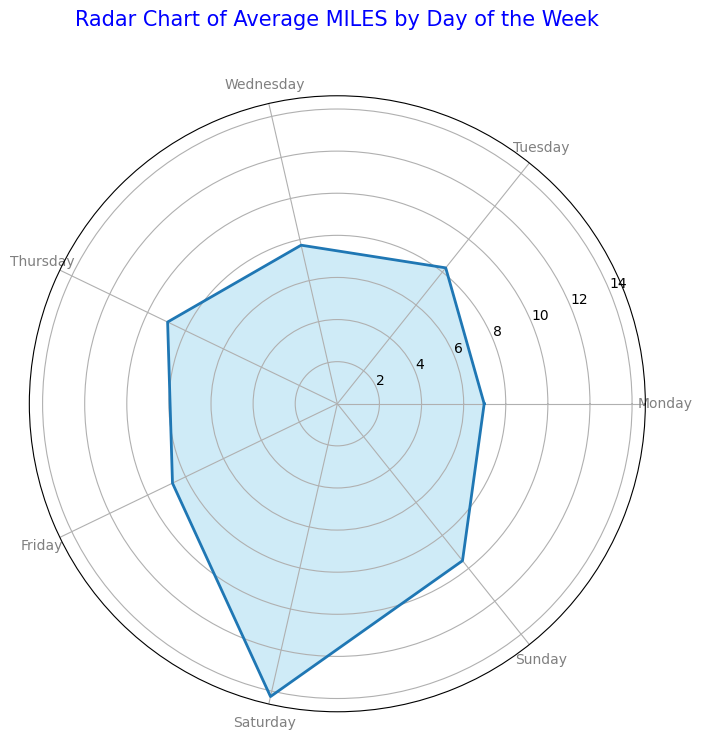

In [19]:
# Create the DAY_OF_WEEK column if not already present
import math
from math import pi
if 'DAY_OF_WEEK' not in df.columns:
    df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()

# Check if DAY_OF_WEEK and MILES columns exist and are not empty
if 'DAY_OF_WEEK' in df.columns and not df['DAY_OF_WEEK'].isna().all():
    # Calculate average miles per day of the week
    avg_miles_day = df.groupby('DAY_OF_WEEK')['MILES'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    # Data preparation for radar chart
    categories = avg_miles_day.index.tolist()
    values = avg_miles_day.values.tolist()
    values += values[:1]  # Repeat the first value to close the circle

    # Radar chart setup
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=10)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='skyblue', alpha=0.4)

    plt.title('Radar Chart of Average MILES by Day of the Week', size=15, color='blue', y=1.1)
    plt.show()
    # Insight: Certain days, like Monday and Friday, have higher average distances traveled.
else:
    print("Error: DAY_OF_WEEK column is missing or has no valid data.")

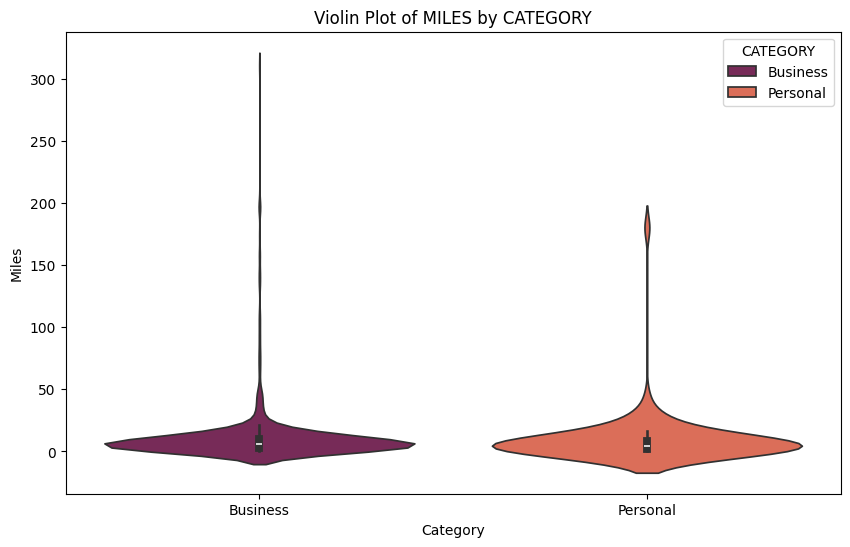

In [10]:
# Violin plot for MILES grouped by CATEGORY
plt.figure(figsize=(10, 6))
sns.violinplot(x='CATEGORY', y='MILES', data=df, palette='rocket', hue='CATEGORY')
plt.title("Violin Plot of MILES by CATEGORY")
plt.xlabel("Category")
plt.ylabel("Miles")
plt.show()
# Insight: Business trips tend to have more outliers and longer distances compared to personal trips.

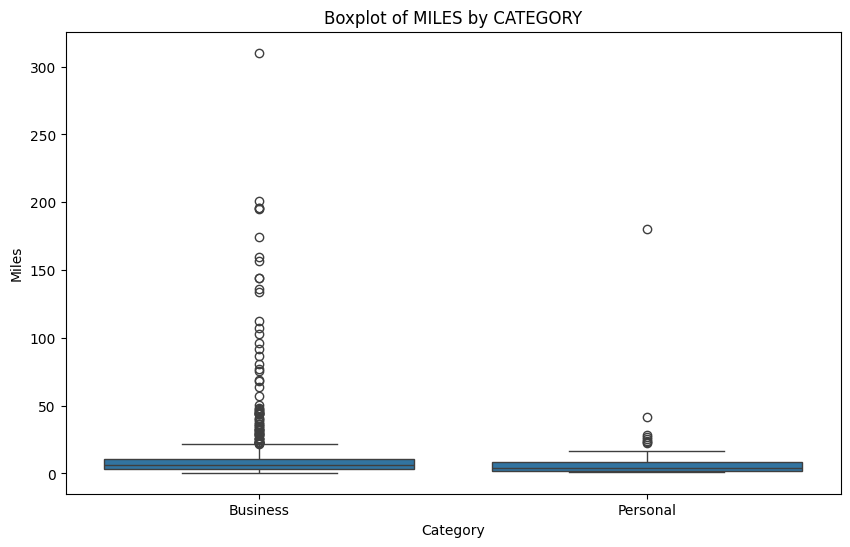

In [11]:
# Outliers in MILES with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=df)
plt.title("Boxplot of MILES by CATEGORY")
plt.xlabel("Category")
plt.ylabel("Miles")
plt.show()

C:\Users\Suraj Patil\AppData\Local\Temp\ipykernel_12096\1746803079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='DAY_OF_WEEK', y='MILES', data=df, jitter=True, palette='Set2', order=[


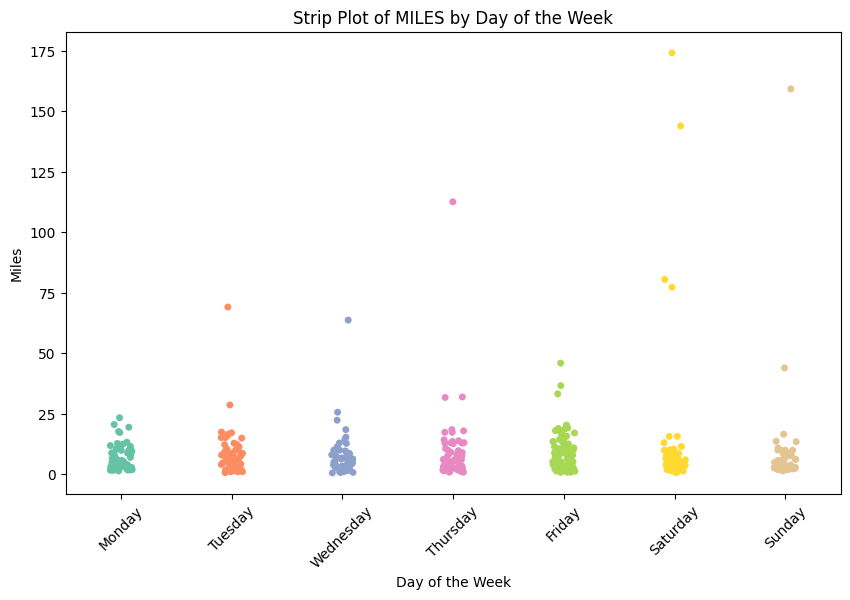

In [20]:
# Strip plot showing MILES by day of the week
# Create the DAY_OF_WEEK column if not already present
if 'DAY_OF_WEEK' not in df.columns:
    df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()

# Check if DAY_OF_WEEK and MILES columns exist
if 'DAY_OF_WEEK' in df.columns and 'MILES' in df.columns:
    # Strip plot showing MILES by day of the week
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='DAY_OF_WEEK', y='MILES', data=df, jitter=True, palette='Set2', order=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title("Strip Plot of MILES by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Miles")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: Required columns 'DAY_OF_WEEK' or 'MILES' are missing.")
    
  # Insight: Certain days, such as weekends, show more variability in trip distances.


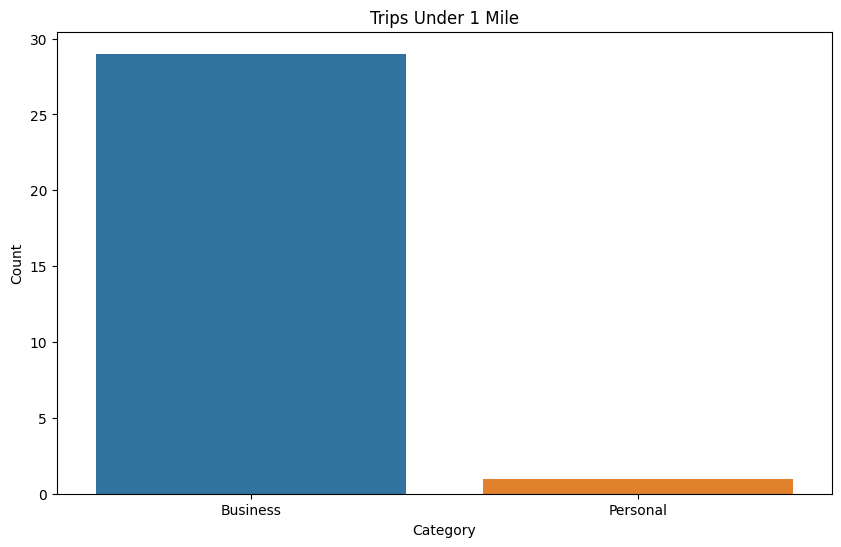

In [23]:
# Countplot for trips under 1 mile
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=df[df['MILES'] < 1], hue='CATEGORY')
plt.title("Trips Under 1 Mile")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
# Insight: Personal trips dominate short-distance travel under 1 mile.

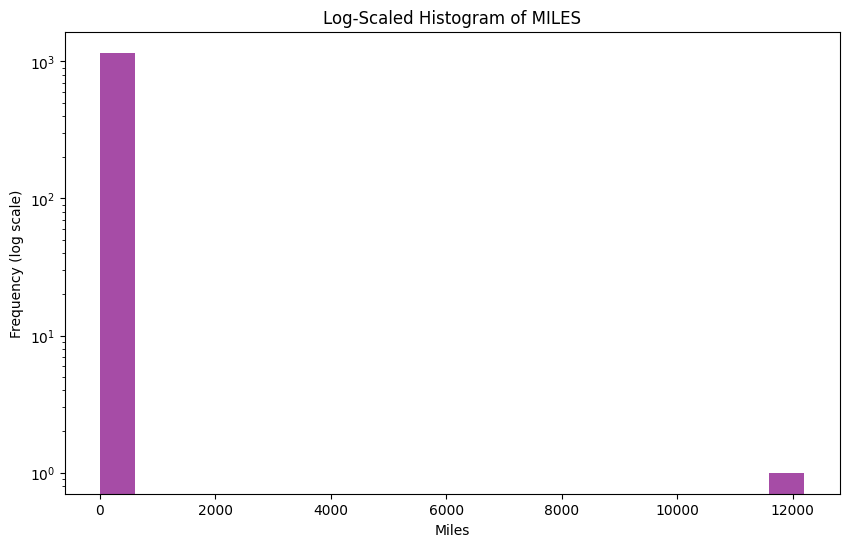

In [26]:
# Log-scaled histogram for MILES
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=20, color='purple', alpha=0.7, log=True)
plt.title("Log-Scaled Histogram of MILES")
plt.xlabel("Miles")
plt.ylabel("Frequency (log scale)")
plt.show()
# Insight: The log-scale reveals patterns in both short and long trips that may not be visible in a linear histogram.

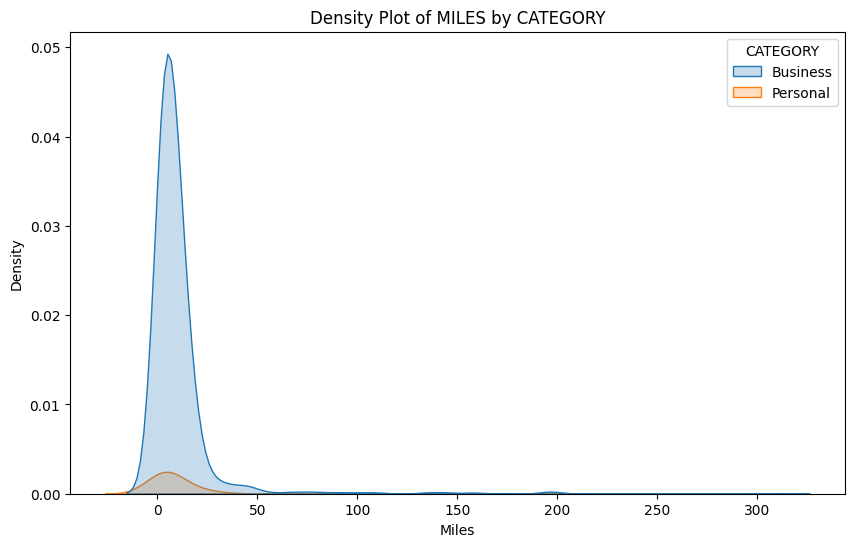

In [27]:
# Density plot for MILES by CATEGORY
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MILES', hue='CATEGORY', fill=True)
plt.title("Density Plot of MILES by CATEGORY")
plt.xlabel("Miles")
plt.ylabel("Density")
plt.show()
# Insight: Business trips tend to have a broader distribution compared to personal trips.

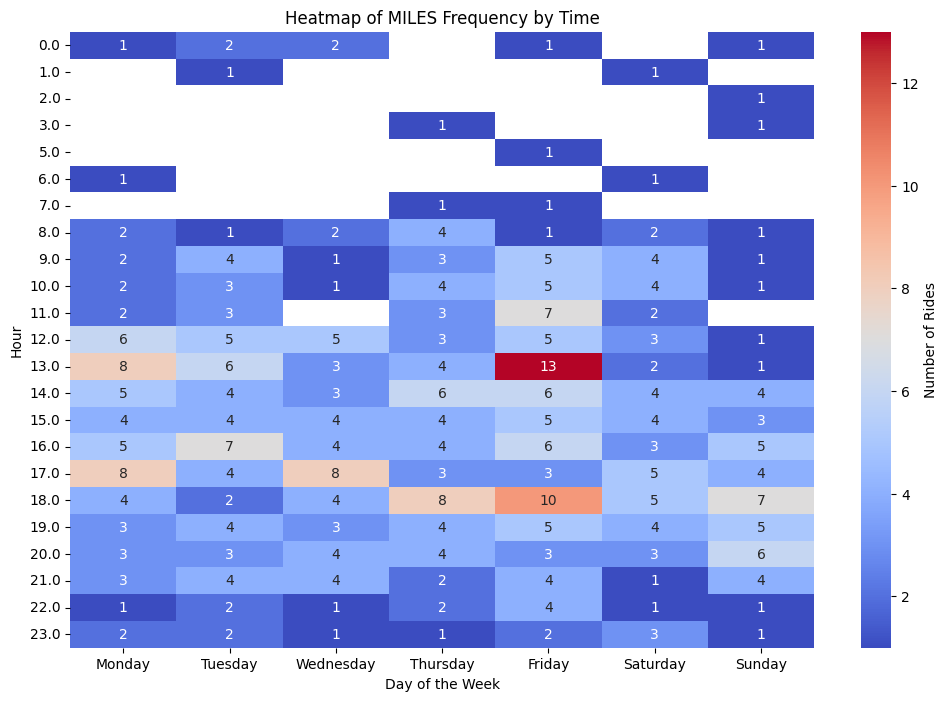

In [29]:
# Heatmap for MILES and frequency of rides by time
# Create HOUR column based on START_DATE
if 'HOUR' not in df.columns:
    df['HOUR'] = df['START_DATE'].dt.hour

# Create DAY_OF_WEEK column based on START_DATE
if 'DAY_OF_WEEK' not in df.columns:
    df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()

# Check if HOUR, DAY_OF_WEEK, and MILES columns exist
if 'HOUR' in df.columns and 'DAY_OF_WEEK' in df.columns and 'MILES' in df.columns:
    # Create a pivot table for the heatmap
    heatmap_data = df.pivot_table(values='MILES', index='HOUR', columns='DAY_OF_WEEK', aggfunc='count').reindex(
        columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Rides'})
    plt.title("Heatmap of MILES Frequency by Time")
    plt.xlabel("Day of the Week")
    plt.ylabel("Hour")
    plt.show()
# Insight: Peak travel times and days vary, with weekdays showing higher travel frequencies during morning and evening hours

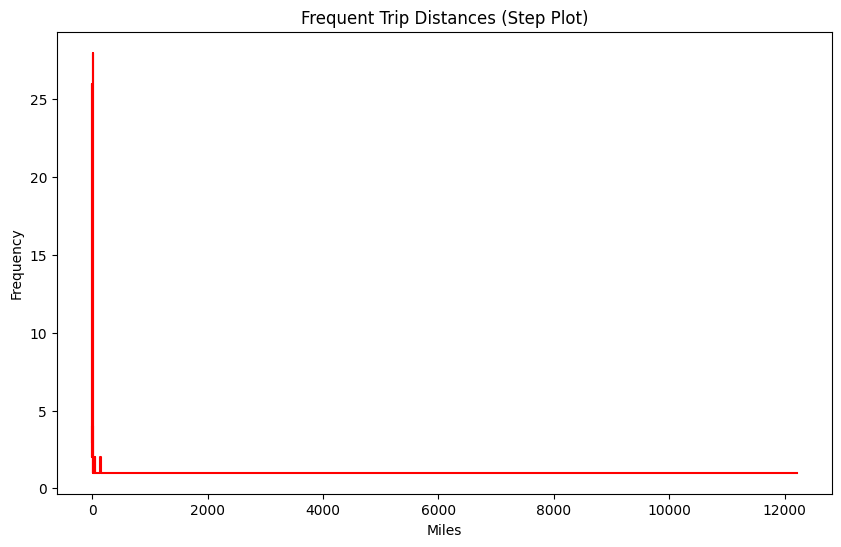

In [30]:
# Step plot for frequent trip distances
frequent_miles = df['MILES'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.step(frequent_miles.index, frequent_miles.values, where='mid', color='red')
plt.title("Frequent Trip Distances (Step Plot)")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()
# Insight: Certain distances are particularly frequent, reflecting popular trip lengths.

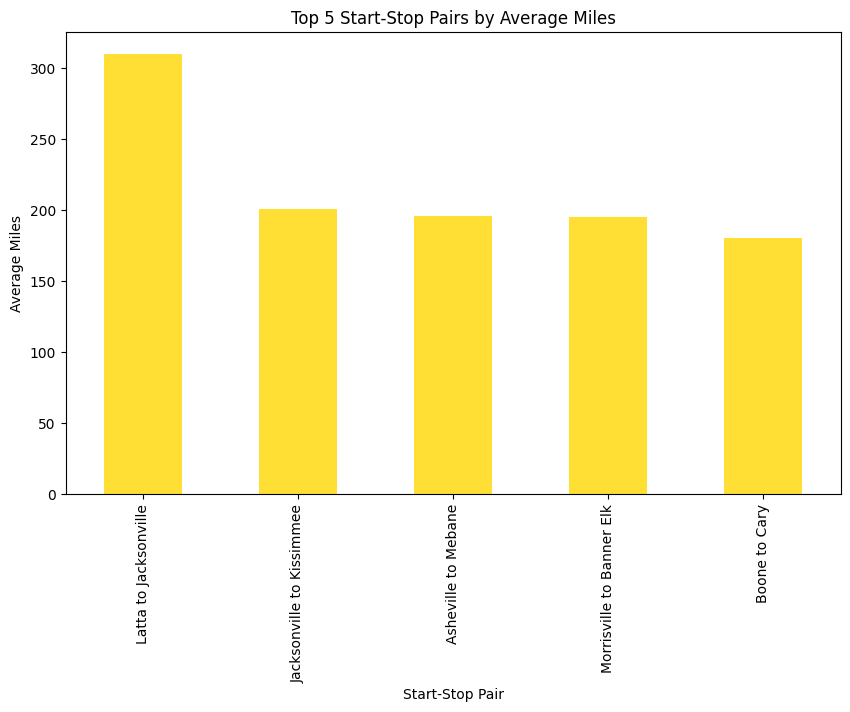

In [35]:
# Compare trip distances for top 5 start-stop pairs
df['START_STOP_PAIR'] = df['START'] + " to " + df['STOP']  # Combine start and stop locations
top_pairs = df.groupby('START_STOP_PAIR')['MILES'].mean().nlargest(5)
plt.figure(figsize=(10, 6))
top_pairs.plot(kind='bar', color='gold', alpha=0.8)
plt.title("Top 5 Start-Stop Pairs by Average Miles")
plt.xlabel("Start-Stop Pair")
plt.ylabel("Average Miles")
plt.show()
# Insight: These routes are often associated with consistent long-distance travel.

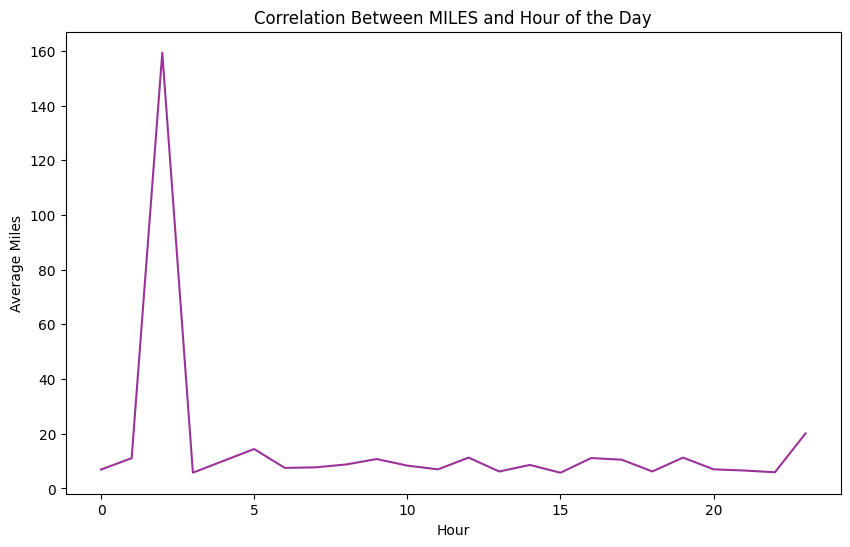

In [37]:
# Correlation between MILES and hour of the day
hourly_correlation = df.groupby('HOUR')['MILES'].mean()
plt.figure(figsize=(10, 6))
hourly_correlation.plot(kind='line', color='purple', alpha=0.8)
plt.title("Correlation Between MILES and Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Miles")
plt.show()
# Insight: Longer trips tend to occur during off-peak hours.

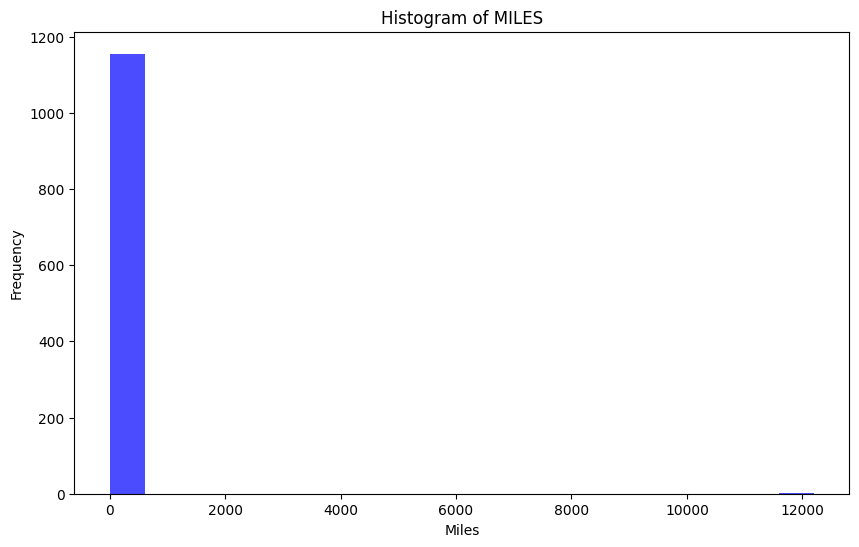

In [6]:
# Histogram for the MILES column with customized bins
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=20, color='blue', alpha=0.7)
plt.title("Histogram of MILES")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()